In [15]:
# os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"]="python"
from ai4bharat.transliteration import XlitEngine
import torch
import os

In [25]:
e = XlitEngine(src_script_type="indic", beam_width=10, rescore=False)
word = "नमस्ते"
pred, raw_attention = e.translit_word(word, lang_code="hi", topk=1, id=1)
proc_attention = raw_attention[1:-1, :-1]
soft_attention = torch.softmax(proc_attention, 0)
assert soft_attention.shape[0] == len(word)
assert soft_attention.shape[1] == len(pred)
pred, word, len(pred), len(word), attention.shape, proc_attention.shape, proc_attention.sum(0), raw_attention.sum(0), soft_attention.sum(0)

Initializing Multilingual model for transliteration


('namaste',
 'नमस्ते',
 7,
 6,
 torch.Size([8, 8]),
 torch.Size([6, 7]),
 tensor([0.8416, 0.4416, 0.7947, 0.5694, 0.7565, 0.7474, 0.5989],
        device='cuda:0'),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        device='cuda:0'),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        device='cuda:0'))

In [3]:
len('नमस्ते'), len("namaste")

(6, 7)

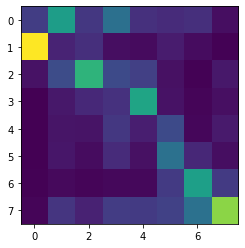

In [12]:
import matplotlib.pyplot as plt
plt.imshow(raw_attention.detach().cpu().numpy())

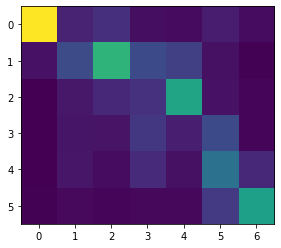

In [13]:
import matplotlib.pyplot as plt
plt.imshow(proc_attention.detach().cpu().numpy())

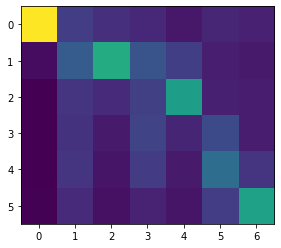

In [24]:
import matplotlib.pyplot as plt
plt.imshow(soft_attention.detach().cpu().numpy())